In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/traffic volume.csv')
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [ ]:
df.shape

(48204, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
df.isnull().sum()

,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [ ]:
df.holiday.value_counts()

,count
holiday,
Labor Day,7
Thanksgiving Day,6
Christmas Day,6
New Years Day,6
Martin Luther King Jr Day,6
Columbus Day,5
Veterans Day,5
Washingtons Birthday,5
Memorial Day,5


In [ ]:
df=df.drop('holiday',axis=1)
df.head()

,temp,rain,snow,weather,date,Time,traffic_volume
0,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [ ]:
df.isnull().sum()

,0
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [ ]:
df['temp'].fillna(df['temp'].median(),inplace=True)
df['rain'].fillna(df['rain'].median(),inplace=True)
df['snow'].fillna(df['snow'].median(),inplace=True)

<ipython-input-9-0898a6a3c533>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(df['temp'].median(),inplace=True)
<ipython-input-9-0898a6a3c533>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isnull().sum()

,0
temp,0
rain,0
snow,0
weather,49
date,0
Time,0
traffic_volume,0


In [ ]:
df.weather.value_counts()

,count
weather,
Clouds,15144
Clear,13383
Mist,5942
Rain,5665
Snow,2875
Drizzle,1818
Haze,1359
Thunderstorm,1033
Fog,912


In [ ]:
df['weather'].fillna(df['weather'].mode()[0],inplace=True)

<ipython-input-12-8a2939fb69b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weather'].fillna(df['weather'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
temp,0
rain,0
snow,0
weather,0
date,0
Time,0
traffic_volume,0


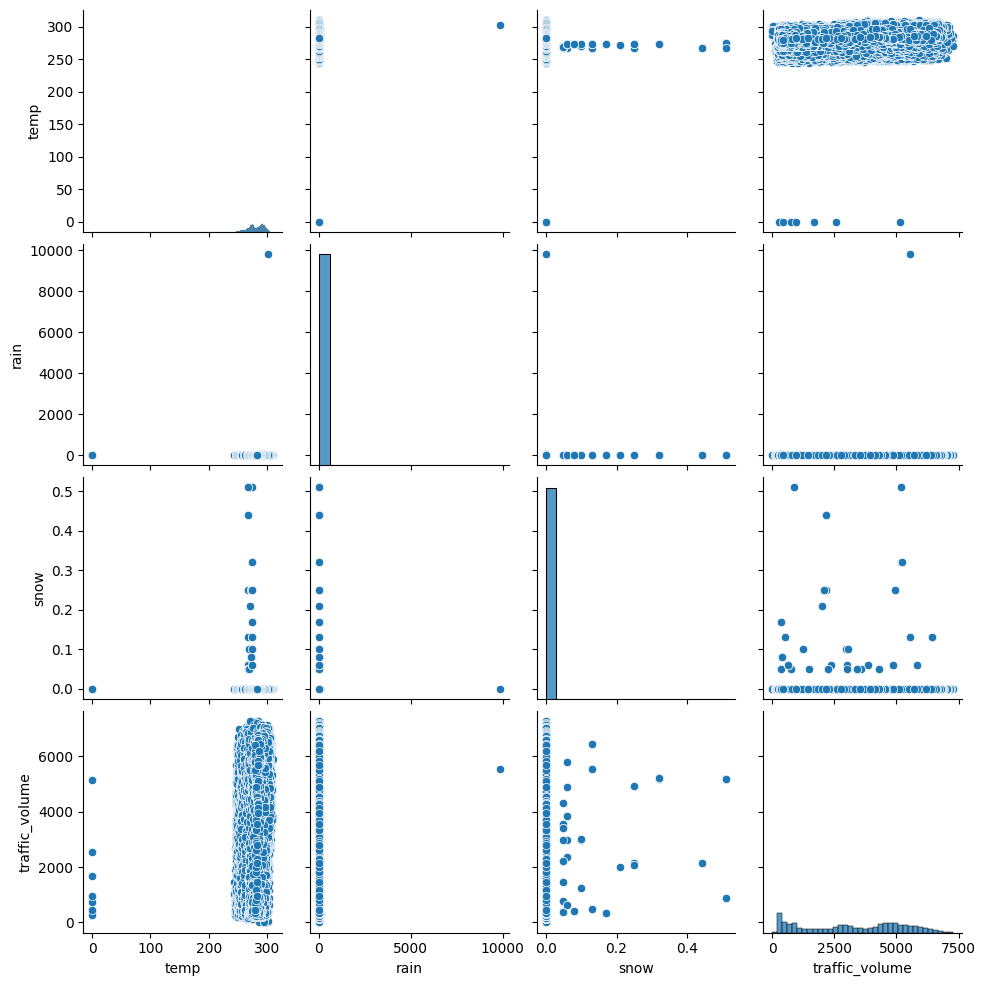

In [ ]:
sns.pairplot(df)

<Axes: >

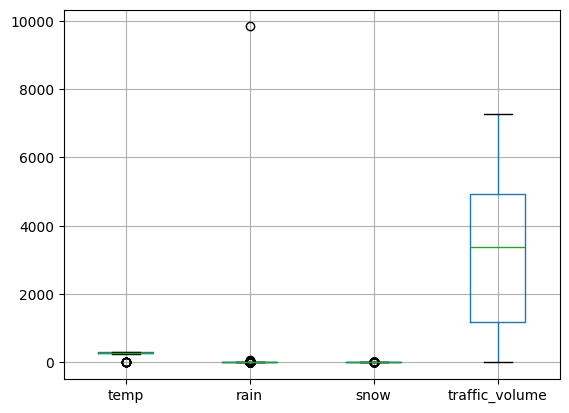

In [ ]:
df.boxplot()

In [ ]:
#converting categorical column into numerical column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.weather=le.fit_transform(df.weather)

In [ ]:
df.head()

,temp,rain,snow,weather,date,Time,traffic_volume
0,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [ ]:
#splitting the date column into year,month and day
df[["day","month","year"]]=df["date"].str.split("-",expand=True)

In [ ]:
#splitting the time column into hour,minute,seconds
df[["hour","minute","seconds"]]=df["Time"].str.split(":",expand=True)

In [ ]:
df.drop(columns=['date','Time'],axis=1,inplace=True)

In [ ]:
df.head()

,temp,rain,snow,weather,traffic_volume,day,month,year,hour,minute,seconds
0,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [ ]:
df.corr()

,temp,rain,snow,weather,traffic_volume,day,month,year,hour,minute,seconds
temp,1.000000,0.009069,-0.019760,-0.033599,0.130051,0.022739,0.223941,0.134687,0.111825,NaN,NaN
rain,0.009069,1.000000,-0.000090,0.009542,0.004714,-0.002294,0.001298,0.000442,0.003421,NaN,NaN
snow,-0.019760,-0.000090,1.000000,0.036663,0.000733,0.015789,0.020412,-0.003519,0.009849,NaN,NaN
weather,-0.033599,0.009542,0.036663,1.000000,-0.040035,0.022539,0.025809,0.037242,-0.053575,NaN,NaN
traffic_volume,0.130051,0.004714,0.000733,-0.040035,1.000000,-0.007587,-0.002533,0.004753,0.352401,NaN,NaN
day,0.022739,-0.002294,0.015789,0.022539,-0.007587,1.000000,0.008614,0.012192,-0.009373,NaN,NaN
month,0.223941,0.001298,0.020412,0.025809,-0.002533,0.008614,1.000000,-0.158688,0.001865,NaN,NaN
year,0.134687,0.000442,-0.003519,0.037242,0.004753,0.012192,-0.158688,1.000000,-0.007542,NaN,NaN
hour,0.111825,0.003421,0.009849,-0.053575,0.352401,-0.009373,0.001865,-0.007542,1.000000,NaN,NaN
minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

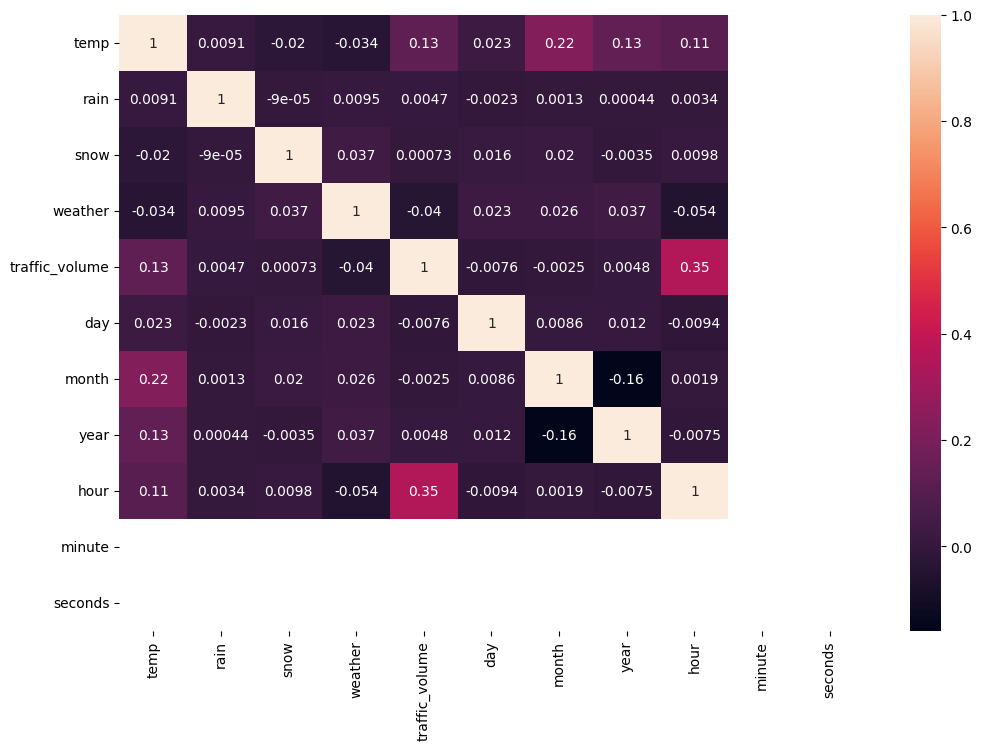

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#X and y split
X=df.drop(columns=['traffic_volume'],axis=1)
y=df.traffic_volume
X.head()

,temp,rain,snow,weather,day,month,year,hour,minute,seconds
0,288.28,0.0,0.0,1,02,10,2012,09,00,00
1,289.36,0.0,0.0,1,02,10,2012,10,00,00
2,289.58,0.0,0.0,1,02,10,2012,11,00,00
3,290.13,0.0,0.0,1,02,10,2012,12,00,00
4,291.14,0.0,0.0,1,02,10,2012,13,00,00


In [ ]:
y.head()

,traffic_volume
0,5545
1,4516
2,4767
3,5026
4,4918


In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X_scaled.head()

,temp,rain,snow,weather,day,month,year,hour,minute,seconds
0,0.929726,0.0,0.0,0.1,0.033333,0.818182,0.0,0.391304,0.0,0.0
1,0.933209,0.0,0.0,0.1,0.033333,0.818182,0.0,0.434783,0.0,0.0
2,0.933918,0.0,0.0,0.1,0.033333,0.818182,0.0,0.478261,0.0,0.0
3,0.935692,0.0,0.0,0.1,0.033333,0.818182,0.0,0.521739,0.0,0.0
4,0.938949,0.0,0.0,0.1,0.033333,0.818182,0.0,0.565217,0.0,0.0


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(38563, 10)

In [ ]:
X_test.shape

(9641, 10)

### Model Building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
import xgboost as xgb

In [35]:
lm=LinearRegression()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
svm=svm.SVR()
xg=xgb.XGBRegressor()

#### Training the model


In [37]:
lm.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)
svm.fit(X_train,y_train)
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Testing the model

In [38]:
lm_pred=lm.predict(X_test)
rf_pred=rf.predict(X_test)
dt_pred=dt.predict(X_test)
svm_pred=svm.predict(X_test)
xg_pred=xg.predict(X_test)

In [43]:
#prediction of linearRegressor
print(lm_pred)

[2772.50274938 3836.54741646 2410.27896006 ... 4344.63997633 2611.58371589
 2002.70431118]


In [41]:
#prediction of RandomForest
print(rf_pred)

[5043.86 2607.63  546.41 ... 3063.95 1949.84  567.9 ]


In [42]:
#prediction of DecisionTree
print(dt_pred)

[5875. 2855.  557. ... 3319.  460.  713.]


In [44]:
#prediction of SVM
print(svm_pred)

[2986.14956269 3310.79281206 2425.11128431 ... 3739.75948975 2955.64063092
 2380.66318385]


In [45]:
#prediction of XG boost
print(xg_pred)

[4427.1187  2953.8784   514.087   ... 3023.8489  1831.1252   302.43774]


###Model Evaluation

##### R2 Score

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
print("R2 score of Linear Regression:",r2_score(lm_pred,y_test))
print("R2 score of Random Forest:",r2_score(rf_pred,y_test))
print("R2 score of Decision Tree:",r2_score(dt_pred,y_test))
print("R2 score of SVM:",r2_score(svm_pred,y_test))
print("R2 score of XG boost:",r2_score(xg_pred,y_test))

R2 score of Linear Regression: -5.410971041587452
R2 score of Random Forest: 0.8074215764498072
R2 score of Decision Tree: 0.695087966461767
R2 score of SVM: -17.82490193708382
R2 score of XG boost: 0.8092619776725769


##### Mean_Squarred_Error

In [50]:
print("Mean Squarred Error of Linear Regression:",mean_squared_error(lm_pred,y_test))
print("Mean Squarred Error of Random Forest:",mean_squared_error(rf_pred,y_test))
print("Mean Squarred Error of Decision Tree:",mean_squared_error(dt_pred,y_test))
print("Mean Squarred Error of SVM:",mean_squared_error(svm_pred,y_test))
print("Mean Squarred Error of XG boost:",mean_squared_error(xg_pred,y_test))

Mean Squarred Error of Linear Regression: 3380567.247823261
Mean Squarred Error of Random Forest: 623868.7954455658
Mean Squarred Error of Decision Tree: 1188701.8588320713
Mean Squarred Error of SVM: 3123464.1012949836
Mean Squarred Error of XG boost: 623572.75


In [53]:
#since we are comparing the both R2 Score and Mean Squared Error The Random Forest Regressor gives the best value
#Random Forest Regressor
print(np.sqrt(mean_squared_error(rf_pred,y_test)))

789.8536544484465


In [55]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))